# **Sales Analysis**


## 1.套件載入







In [ ]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

## 2.合併 2019 年 12 個月份的銷售資料
PS: glob 是一個檔名模式匹配(filename pattern matching)模組(Module)，用來定義檔案規則，取得相匹配的檔案清單串列(List)，讓我們在合併多個檔案資料的過程中，能夠一次取得所有的檔案清單，提升讀取效率。 

補充: https://www.learncodewithmike.com/2021/05/pandas-merge-multiple-csv-files.html

In [ ]:
# 讀取檔案路徑
files = glob('/content/drive/MyDrive/Colab Notebooks/Projects/Project 2 - Sales analysis/Data/Sales*.csv')
for file in files:
  print(file)

/content/drive/MyDrive/Colab Notebooks/Projects/Project 2 - Sales analysis/Data/Sales_September_2019.csv
/content/drive/MyDrive/Colab Notebooks/Projects/Project 2 - Sales analysis/Data/Sales_April_2019.csv
/content/drive/MyDrive/Colab Notebooks/Projects/Project 2 - Sales analysis/Data/Sales_July_2019.csv
/content/drive/MyDrive/Colab Notebooks/Projects/Project 2 - Sales analysis/Data/Sales_February_2019.csv
/content/drive/MyDrive/Colab Notebooks/Projects/Project 2 - Sales analysis/Data/Sales_June_2019.csv
/content/drive/MyDrive/Colab Notebooks/Projects/Project 2 - Sales analysis/Data/Sales_October_2019.csv
/content/drive/MyDrive/Colab Notebooks/Projects/Project 2 - Sales analysis/Data/Sales_December_2019.csv
/content/drive/MyDrive/Colab Notebooks/Projects/Project 2 - Sales analysis/Data/Sales_August_2019.csv
/content/drive/MyDrive/Colab Notebooks/Projects/Project 2 - Sales analysis/Data/Sales_March_2019.csv
/content/drive/MyDrive/Colab Notebooks/Projects/Project 2 - Sales analysis/Data/

In [ ]:
# 合併12個檔案
df = pd.DataFrame()
for file in files:
  ind_df = pd.read_csv(file)
  df = pd.concat([df, ind_df])

# 輸出一份合併後的檔案
df.to_csv("Sales_2019.csv", index=False)

In [ ]:
# 查看合併後的檔案
print(f"df_shape: {df.shape}\n")
print(df.info(), '\n')
df.head()

df_shape: (186850, 6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 16634
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB
None 



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


*   **從上可知每一欄皆有缺失值: 545 筆 (186850 - 186305)**
*   **有些欄位的資料型態要修正**



## 3.資料清洗

In [ ]:
df1 = df.copy()

### 處理 缺失值

In [ ]:
# 查看 NaN 情況
df1.loc[df1.isna().any(axis=1)].head()   # 找出有NaN的row  ps:只要一格有NaN,就算   補充: https://www.delftstack.com/zh-tw/howto/python-pandas/how-to-check-if-nan-exisits-in-pandas-dataframe/  

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
198,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 刪除缺失值 ps:一筆資料中,每一格都缺失，才刪除
df1 = df1.dropna(axis=0, how='all')
print(f"df1_shape: {df1.shape}\n")
df1.head()

df1_shape: (186305, 6)



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [ ]:
# 查看是否還有缺失值
df1.isna().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

### 處理 重複值 & typos

In [ ]:
# 刪除重複值前，一定要先查看重複值的情況，因為可能從中發現一些數據有問題
df1.loc[df1.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
21,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001"
658,248787,AA Batteries (4-pack),1,3.84,09/09/19 12:30,"705 Adams St, San Francisco, CA 94016"
1822,249895,34in Ultrawide Monitor,1,379.99,09/19/19 22:14,"901 South St, San Francisco, CA 94016"
1839,249910,AAA Batteries (4-pack),1,2.99,09/09/19 18:34,"295 Meadow St, San Francisco, CA 94016"
2113,250174,Apple Airpods Headphones,1,150,09/30/19 19:32,"490 6th St, New York City, NY 10001"
...,...,...,...,...,...,...
14291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
15419,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
15963,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
16234,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


*   **上面發現到資料有問題 (有typos)** 



In [ ]:
# 刪掉 typos
df1 = df1.loc[df1["Order ID"] != 'Order ID']
df1.loc[df1.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
21,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001"
658,248787,AA Batteries (4-pack),1,3.84,09/09/19 12:30,"705 Adams St, San Francisco, CA 94016"
1822,249895,34in Ultrawide Monitor,1,379.99,09/19/19 22:14,"901 South St, San Francisco, CA 94016"
1839,249910,AAA Batteries (4-pack),1,2.99,09/09/19 18:34,"295 Meadow St, San Francisco, CA 94016"
2113,250174,Apple Airpods Headphones,1,150,09/30/19 19:32,"490 6th St, New York City, NY 10001"
...,...,...,...,...,...,...
8542,202212,Macbook Pro Laptop,1,1700,05/25/19 13:19,"10 1st St, San Francisco, CA 94016"
10278,203850,AAA Batteries (4-pack),1,2.99,05/18/19 17:17,"54 Adams St, Dallas, TX 75001"
11494,205018,USB-C Charging Cable,1,11.95,05/16/19 22:32,"859 Lincoln St, Boston, MA 02215"
13978,207395,USB-C Charging Cable,1,11.95,05/18/19 07:44,"740 Wilson St, San Francisco, CA 94016"


In [ ]:
# 刪除 重複值
df1 = df1.drop_duplicates()
df1.loc[df1.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### 轉換欄位的資料型態

In [ ]:
df1["Quantity Ordered"] = df1["Quantity Ordered"].astype("int32")
df1["Price Each"] = df1["Price Each"].astype("float32")
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 16634
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  object 
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int32  
 3   Price Each        185686 non-null  float32
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
dtypes: float32(1), int32(1), object(4)
memory usage: 8.5+ MB




*   **這裡不打算用 pd.to_datetime() 轉換 "Order Date" 欄位，因為想練習用提取字元的方式 (見下面)** 



## 4.新增欄位

In [ ]:
df2 = df1.copy()

### 欄位 - Month

In [ ]:
df2["Month"] = df2["Order Date"].str.split("/", expand=True)[0]   # 另法: df["Order Date"].str[0:2]
df2["Month"] = df2["Month"].astype("int32")

### 欄位 - Sales

In [ ]:
df2["Sales"] = df2["Quantity Ordered"] * df2["Price Each"]

### 欄位 - City

In [ ]:
def get_city(address):
  return address.split(',')[1]
def get_state(address):
  return address.split(',')[2].split(' ')[1]   # 第二次split然後選[1]，是因為"Purchase Address"欄位，州的前面有一個空格

df2['City'] = df2["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 

In [ ]:
print(f"df2_shape: {df2.shape}\n")
print(df2.info(), '\n')
df2.head()

df2_shape: (185686, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 16634
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  object 
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int32  
 3   Price Each        185686 non-null  float32
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
 6   Month             185686 non-null  int32  
 7   Sales             185686 non-null  float64
 8   City              185686 non-null  object 
dtypes: float32(1), float64(1), int32(2), object(5)
memory usage: 12.0+ MB
None 



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.840000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.360000,Los Angeles (CA)
1,248152,USB-C Charging Cable,2,11.950000,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.900000,Austin (TX)
2,248153,USB-C Charging Cable,1,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.950000,Los Angeles (CA)
3,248154,27in FHD Monitor,1,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.990005,Seattle (WA)
4,248155,USB-C Charging Cable,1,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.950000,Atlanta (GA)


## 5.回答商業問題

In [ ]:
df3 = df2.copy()

### (一)每月的 Sales? 哪個月份最高 ?



In [ ]:
Sales_per_month = df3.groupby('Month')["Sales"].agg("sum")
round(Sales_per_month, 2)   # 使用 Python 內建的函式 round() 來實現四捨五入到小數點後兩位

Month
1     1821413.15
2     2200078.07
3     2804973.34
4     3389217.96
5     3150616.21
6     2576280.14
7     2646461.31
8     2241083.36
9     2094465.68
10    3734777.84
11    3197875.03
12    4608295.68
Name: Sales, dtype: float64

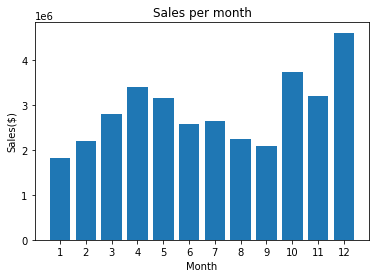

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.bar(x=Sales_per_month.index, height=Sales_per_month.values)   # 注意plt.bar(x, height): y 放在 height
plt.title('Sales per month')
plt.xticks(Sales_per_month.index)   # 完整顯示每個月份的刻度
plt.xlabel('Month')
plt.ylabel('Sales($)')
#plt.ylim(0, Sales_per_month.max())
plt.show()



*   **銷售額最高: 12 月 ； 銷售額最低: 1 月**
*   **猜測: 美國在年底時有聖誕節，所以銷售額最高**



### (二)哪個 City 的 Sales 最高 ?

In [ ]:
Sales_per_city = df3.groupby('City').Sales.sum()
Sales_per_city

City
 Atlanta (GA)          2.794199e+06
 Austin (TX)           1.818044e+06
 Boston (MA)           3.658628e+06
 Dallas (TX)           2.765374e+06
 Los Angeles (CA)      5.448304e+06
 New York City (NY)    4.661867e+06
 Portland (ME)         4.493214e+05
 Portland (OR)         1.870011e+06
 San Francisco (CA)    8.254744e+06
 Seattle (WA)          2.745046e+06
Name: Sales, dtype: float64

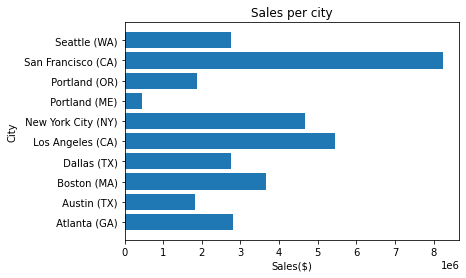

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.barh(y=Sales_per_city.index, width=Sales_per_city.values)   # 注意plt.barh(y, width): x 放在 width
plt.title('Sales per city')
plt.ylabel('City')
plt.xlabel('Sales($)')
plt.show()

*   **銷售額最高: San Francisco (CA) ； 銷售額最低: Portland (ME)**
*   **猜測: San Francisco (CA) 離矽谷較近，當地可能住很多資訊背景的人，所以對電子產品的需求較高 ； 在 Portland (ME) 砸的廣告費用較少** 


### (三)何時打廣告，能極大提高顧客購買產品的可能性 ?

In [ ]:
# 轉換 "Order Date" 欄位的資料型態
df3['Order Date'] = pd.to_datetime(df3['Order Date'])

In [ ]:
# 新增欄位 - Hour
df3['Hour'] = df3['Order Date'].dt.hour
df3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,248151,AA Batteries (4-pack),4,3.840000,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.360000,Los Angeles (CA),14
1,248152,USB-C Charging Cable,2,11.950000,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.900000,Austin (TX),10
2,248153,USB-C Charging Cable,1,11.950000,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.950000,Los Angeles (CA),17
3,248154,27in FHD Monitor,1,149.990005,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.990005,Seattle (WA),7
4,248155,USB-C Charging Cable,1,11.950000,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.950000,Atlanta (GA),19


Hour
0    3902
1    2347
2    1242
3     830
4     852
Name: Order ID, dtype: int64 




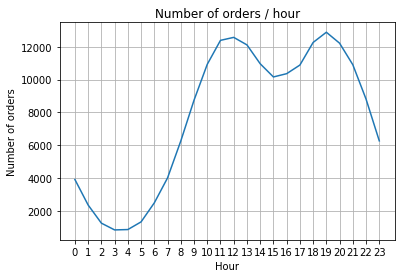

In [ ]:
# 查看全年每小時的訂單總數
order_per_hour = df3.groupby('Hour')['Order ID'].count()
print(order_per_hour.head(), '\n\n')

# 視覺化呈現
fig = plt.figure()
plt.plot(order_per_hour.index, order_per_hour.values)
plt.title('Number of orders / hour')
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.xticks(order_per_hour.index)   # 完整顯示每小時的刻度
plt.grid()   # 畫出網格，方便對照 時間&數量
plt.show()

*   **投放廣告較佳時間: 中午 12 點附近 & 傍晚 7 點附近** 
*   **猜測: 中午及傍晚時間，人們通常手邊的事情都先告一段落，開始放鬆休息滑 3C**


### (四)顧客比較常一起買哪些商品 ?

In [ ]:
# 查看重複出現的 "Order ID"
order_above_two_product = df3.loc[df3["Order ID"].duplicated(keep=False)]   # 一筆訂單裡面購買的商品超過 1 樣
order_above_two_product.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
60,248210,iPhone,1,700.000000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,700.000000,San Francisco (CA),10
61,248210,Lightning Charging Cable,1,14.950000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,14.950000,San Francisco (CA),10
70,248219,Bose SoundSport Headphones,1,99.989998,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,99.989998,Los Angeles (CA),12
71,248219,Google Phone,1,600.000000,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,600.000000,Los Angeles (CA),12
117,248265,Vareebadd Phone,1,400.000000,2019-09-24 14:07:00,"939 14th St, San Francisco, CA 94016",9,400.000000,San Francisco (CA),14


In [ ]:
# 新增欄位 - "Order_Products":同一筆訂單裡面包含的所有商品
order_above_two_product['Order_Products'] = order_above_two_product.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
order_above_two_product.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Order_Products
60,248210,iPhone,1,700.000000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,700.000000,San Francisco (CA),10,"iPhone,Lightning Charging Cable"
61,248210,Lightning Charging Cable,1,14.950000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,14.950000,San Francisco (CA),10,"iPhone,Lightning Charging Cable"
70,248219,Bose SoundSport Headphones,1,99.989998,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,99.989998,Los Angeles (CA),12,"Bose SoundSport Headphones,Google Phone"
71,248219,Google Phone,1,600.000000,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,600.000000,Los Angeles (CA),12,"Bose SoundSport Headphones,Google Phone"
117,248265,Vareebadd Phone,1,400.000000,2019-09-24 14:07:00,"939 14th St, San Francisco, CA 94016",9,400.000000,San Francisco (CA),14,"Vareebadd Phone,Bose SoundSport Headphones"


In [ ]:
# 刪掉重複出現的 "Order ID"，同一筆 "Order ID" 只保留一筆
temp = order_above_two_product[['Order ID', 'Order_Products']].drop_duplicates()
temp.head()

,Order ID,Order_Products
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"
183,248329,"Vareebadd Phone,Wired Headphones"


In [ ]:
# 計算同樣的商品清單出現的次數，從中了解顧客較常一起買哪些商品
from itertools import combinations   # 補充: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from collections import Counter

count = Counter()
for row in temp["Order_Products"]:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))   # 2 可以調整成其他數字

for key, value in count.most_common(10):
  print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92




*   **數據觀察 ex: 顧客很常一起買 iPhone & Lightning Charging Cable ； 反過來想，通常這兩項商品是合在一起賣的**
*   **我的想法: 包含3件以上商品的熱銷清單，可能比較適合作為行銷方案的參考**






### (五)哪個產品賣最好 ?  為什麼它賣最好？

Product
20in Monitor               4126
27in 4K Gaming Monitor     6239
27in FHD Monitor           7541
34in Ultrawide Monitor     6192
AA Batteries (4-pack)     27615
Name: Quantity Ordered, dtype: int32 




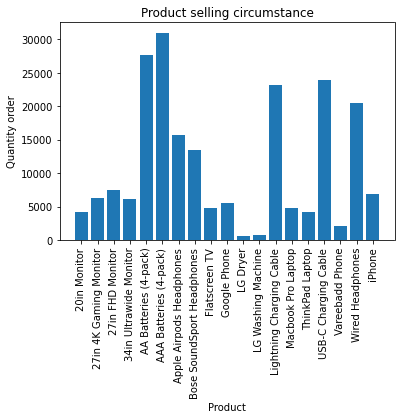

In [ ]:
# 產品全年銷售數量
num_product_sell = df3.groupby('Product')['Quantity Ordered'].sum()
print(num_product_sell.head(), '\n\n')

# 視覺化呈現
fig = plt.figure()
plt.bar(x=num_product_sell.index, height=num_product_sell.values)
plt.title('Product selling circumstance')
plt.xlabel('Product')
plt.ylabel('Quantity order')
plt.xticks(num_product_sell.index, rotation=90)
plt.show()



*   **賣最好: AAA Batteries**
*   **賣最差: LG Dryer，LG Washing Machine**
*   **猜測: 與 價格 & 需求 & 使用頻率 & 商品壽命 有關係**   



Product
20in Monitor              109.989998
27in 4K Gaming Monitor    389.989990
27in FHD Monitor          149.990005
34in Ultrawide Monitor    379.989990
AA Batteries (4-pack)       3.840000
Name: Price Each, dtype: float32 




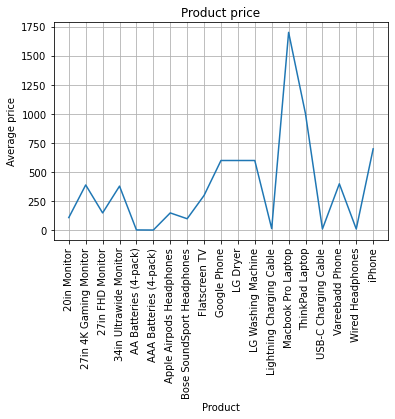

In [ ]:
# 每項產品的平均價格
ave_price_product = df3.groupby('Product')['Price Each'].mean()
print(ave_price_product.head(), '\n\n')

# 視覺化呈現
fig = plt.figure()
plt.plot(ave_price_product.index, ave_price_product.values)
plt.title("Product price")
plt.xlabel('Product')
plt.ylabel('Average price')
plt.xticks(ave_price_product.index, rotation=90)
plt.grid()
plt.show()

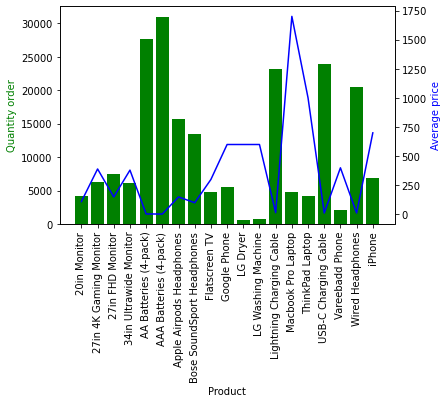

In [ ]:
# 合併上面兩張圖 - 產品全年銷售量&每項產品的平均價格
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(x=num_product_sell.index, height=num_product_sell.values, color='g')
ax2.plot(ave_price_product.index, ave_price_product.values, color='b')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity order', color='g')
ax2.set_ylabel('Average price', color='b')
ax1.set_xticklabels(ave_price_product.index, rotation='vertical')   # 加這行才能把 x 軸的標籤名稱正確顯示出來

plt.show()



*   **圖表觀察: 價格 & 數量 大致上成反比**



